In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
from PIL import Image

In [2]:
def preprocess_image(image): 
    #resize image
    image_resized = cv2.resize(image, dsize=(96, 96), interpolation=cv2.INTER_CUBIC)
    #reshape image
    image_reshaped = image_resized.reshape(1,96,96,1)
    #scale image
    X = image_reshaped/255.
    return X

In [3]:
csv_path = os.path.join('..', 'raw_data', 'test.csv')
csv_path

'../raw_data/test.csv'

In [4]:
data = pd.read_csv(csv_path)
data

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [5]:
img1 = np.array(data.Image[0].split(), dtype='float')
img1Array = img1.reshape((96,96))

In [6]:
img1.shape

(9216,)

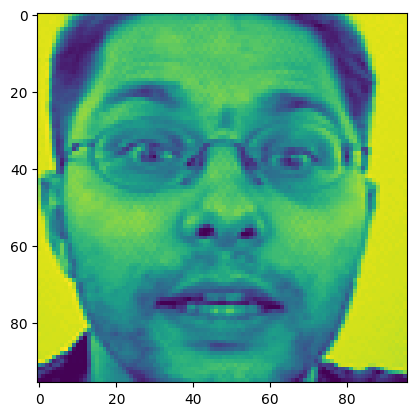

In [7]:
plt.imshow(img1Array)
plt.show()

In [8]:
def preprocess_image(image): 
    #resize image
    image_resized = cv2.resize(image, dsize=(96, 96), interpolation=cv2.INTER_CUBIC)
    #reshape image
    image_reshaped = image_resized.reshape(1,96,96,1)
    #scale image
    X = image_reshaped/255.
    return X

In [9]:
X = preprocess_image(img1Array)

In [10]:
model = pickle.load(open("./model_keypoints_detection.pkl","rb"))
y_pred = model.predict(X, verbose='auto')
keypoints = y_pred[0].reshape(15, 2)

2022-11-19 13:13:24.269342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 13:13:27.693848: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-19 13:13:28.074702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dushyant/.pyenv/versions/3.8.12/envs/lewagon/envs/facial_keypoints_detection/lib/python3.8

1/1 [==============================] - 1s 640ms/step


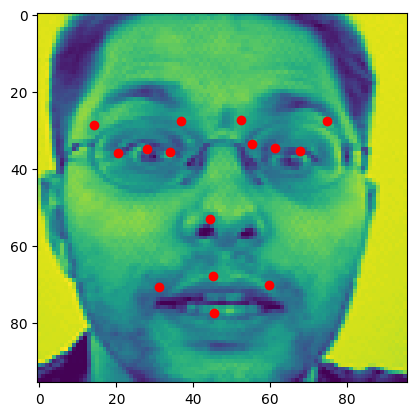

In [11]:
plt.imshow(img1Array)
plt.scatter(x=keypoints[:,0], y=keypoints[:,1], c='red')
plt.show()

In [13]:
model.save("../my_streamlit_page/my_model")

INFO:tensorflow:Assets written to: ../my_streamlit_page/my_model/assets


INFO:tensorflow:Assets written to: ../my_streamlit_page/my_model/assets


In [1]:
import streamlit as st
import numpy as np
import requests
from PIL import Image
# import pickle
# import cv2
import matplotlib.pyplot as plt

In [ ]:

# st.write("HELLO")

# def load_image(image_file):
# 	img = Image.open(image_file)
# 	return img

def plot_keypoints(img, keypoints):
  fig, ax = plt.subplots()
  ax.imshow(img)
  ax.scatter(x=keypoints[:,0], y=keypoints[:,1], c='red')
  st.pyplot(fig)
  
# def main():
# st.title("File Upload Tutorial")
# st.subheader("Image")
# image_file = st.file_uploader("Upload Images", type=["png","jpg","jpeg"])

# if image_file is not None:
#   # To See details
#   file_details = {"filename":image_file.name, "filetype":image_file.type,
#                         "filesize":image_file.size}
#   st.write(file_details)
#   # To View Uploaded Image
#   st.image(load_image(image_file),width=250)

#   # convert img to np_array
#   img = Image.open(image_file)
#   img_np = np.array(img)[:,:,0]
#   # data = {'arr': img_np.tolist()}

#   # processed_img = preprocess_image(img_np)
#   # keypoints = predict_keypoints(processed_img)

#   # plot_keypoints(b_w_img, keypoints)
#   data = {'test': "yooooo"}
#   url = "http://127.0.0.1:8000/predict_keypoints/"
#   response = requests.get(url+'yooo')# data=data)

#   st.write(response.json())



In [3]:
img = Image.open("test_image.png")

In [4]:
img_np = np.array(img)[:,:,0]

In [5]:
data = {'keypoints': "yooooo"}
url = "http://127.0.0.1:8000/predict_keypoints/"

In [40]:

response = requests.post(url, data=img_np.tobytes())

response.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [17]:
import io
buf = io.BytesIO()
plt.imsave(buf, img_np, format='png')
image_data = buf.getvalue()
var_0 = requests.post(url, data=image_data)
var_0.json()


In [ ]:
files = {'file': img}
response = requests.post(url, files=files)